IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M5\NO_FAULT5


VARIABILE RCOU POTENZA MOTORI

In [3]:
pd.set_option('display.max_rows',700)

In [4]:
#andiamo a prendere una potenza media di 1400 per considerare il momento il cui inizia/finisce il volo
rcou_m5 = pd.read_csv("RCOU.csv")
rcou_m5 = rcou_m5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m5 = rcou_m5[((rcou_m5['C9'] >= 1400) & (rcou_m5['C10'] >= 1400) & (rcou_m5['C11'] >= 1400) & (rcou_m5['C12'] >= 1400) & (rcou_m5['C13'] >= 1400) & (rcou_m5['C14']>= 1400))]

display(rcou_m5)

,TimeUS,C9,C10,C11,C12,C13,C14
1791,102558488,1407,1441,1429,1419,1409,1439
1792,102568605,1458,1401,1427,1434,1452,1407
1795,102599657,1447,1448,1457,1438,1454,1442
1800,102654102,1531,1418,1471,1483,1524,1426
1801,102664652,1530,1432,1478,1488,1524,1439
...,...,...,...,...,...,...,...
7205,162073281,1563,1441,1563,1441,1409,1588
7207,162094796,1579,1427,1567,1443,1431,1576
7208,162106210,1560,1455,1581,1430,1420,1588
7209,162116670,1600,1405,1544,1474,1426,1585


In [5]:
#xkf utilizzato per fare poi il confronto con i valori di roll, pitch e yaw in att
xkf1_m5 = pd.read_csv("XKF1_0.csv")
xkf1_m5 = xkf1_m5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m5 = xkf1_m5[((xkf1_m5['TimeUS'] >= 102558488) & (xkf1_m5['TimeUS'] <= 162415182))]
print(xkf1_m5)

         TimeUS  Roll  Pitch    Yaw
1794  102566445  1.95  -1.47  10.85
1795  102576474  2.00  -1.49  10.84
1796  102587043  1.94  -1.49  10.85
1797  102597394  1.87  -1.46  10.85
1798  102610849  1.91  -1.53  10.84
...         ...   ...    ...    ...
7235  162367202 -2.12   0.86   6.06
7236  162377201 -2.10   0.79   6.10
7237  162388204 -1.99   0.73   6.09
7238  162402330 -2.00   0.68   6.13
7239  162412794 -1.95   0.62   6.14

[5446 rows x 4 columns]


In [6]:
att_m5 = pd.read_csv("ATT.csv")
att_m5 = att_m5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m5 = att_m5[((att_m5['TimeUS'] >= 102558488) & (att_m5['TimeUS'] <= 162415182))]
print(att_m5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
1794  102567832    -0.11  1.95      0.17  -1.47   10.80  10.85
1795  102578193    -0.10  2.00      0.17  -1.49   10.80  10.84
1796  102588299    -0.09  1.94      0.16  -1.49   10.80  10.85
1797  102598769    -0.07  1.87      0.15  -1.46   10.80  10.85
1798  102611861    -0.06  1.91      0.14  -1.53   10.80  10.84
...         ...      ...   ...       ...    ...     ...    ...
7235  162368616    -0.60 -2.12     -0.52   0.86    2.66   6.06
7236  162379265    -0.57 -2.10     -0.55   0.79    2.66   6.10
7237  162389771    -0.54 -1.99     -0.57   0.73    2.66   6.09
7238  162403605    -0.52 -2.00     -0.58   0.68    2.66   6.13
7239  162414576    -0.50 -1.95     -0.59   0.62    2.66   6.14

[5446 rows x 7 columns]


In [7]:
#controllo corrispondenza valori roll, pitch, yaw
att_m5 = pd.merge_asof(att_m5, xkf1_m5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0     102567832    -0.11  1.95      0.17  -1.47   10.80  10.85
1     102578193    -0.10  2.00      0.17  -1.49   10.80  10.84
2     102588299    -0.09  1.94      0.16  -1.49   10.80  10.85
3     102598769    -0.07  1.87      0.15  -1.46   10.80  10.85
4     102611861    -0.06  1.91      0.14  -1.53   10.80  10.84
...         ...      ...   ...       ...    ...     ...    ...
5441  162368616    -0.60 -2.12     -0.52   0.86    2.66   6.06
5442  162379265    -0.57 -2.10     -0.55   0.79    2.66   6.10
5443  162389771    -0.54 -1.99     -0.57   0.73    2.66   6.09
5444  162403605    -0.52 -2.00     -0.58   0.68    2.66   6.13
5445  162414576    -0.50 -1.95     -0.59   0.62    2.66   6.14

[5446 rows x 7 columns]


In [8]:
#elettricita' che scorre nel motore considerato, al momento ne consideriamo solo 1
esc_4_m5 = pd.read_csv("ESC_4.csv")
esc_4_m5 = esc_4_m5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_4_m5 = esc_4_m5[((esc_4_m5['TimeUS'] >= 102558488) & (esc_4_m5['TimeUS'] <= 162415182))]
print(esc_4_m5)

        TimeUS   RPM  Curr
168  102596800  4350  2.53
169  102819716  4780  3.61
170  102924293  5743  2.62
171  103153647  5829  1.78
172  103258521  5211  2.30
173  103365515  5171  2.31
174  103577793  5227  1.92
175  103693114  5151  2.07
176  103800572  5081  2.42
177  103916668  5250  2.64
178  104023853  5343  2.47
179  104239388  5356  2.54
180  104350502  5353  2.56
181  104450675  5445  2.44
182  104564876  5284  2.35
183  104670646  5407  2.22
184  104777053  5326  2.30
185  104893545  5218  2.58
186  104993088  5273  2.53
187  105108636  5466  2.46
188  105322773  5419  2.41
189  105542049  5577  2.61
190  105650493  5431  2.47
191  105762676  5483  2.57
192  105863592  5611  2.61
193  105979065  5590  2.81
194  106083819  5787  2.91
195  106193127  5650  2.74
196  106405641  5583  2.68
197  106512792  5511  2.46
198  106744790  5486  2.52
199  106841603  5525  2.58
200  106961264  5401  2.00
201  107059819  5381  1.90
202  107176690  5002  1.96
203  107269596  4922  1.37
2

In [9]:
#valori di accelerazione e del giroscopio
imu_2_m5 = pd.read_csv("IMU_2.csv")
imu_2_m5 = imu_2_m5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m5 = imu_2_m5[((imu_2_m5['TimeUS'] >= 102558488) & (imu_2_m5['TimeUS'] <= 162415182))]
print(imu_2_m5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
7101   102560542 -0.021223  0.003547  0.012258 -0.211313 -0.488808 -10.350420
7102   102563137  0.031220  0.029270  0.014277 -0.306166 -0.405370 -10.475290
7103   102565689  0.059541  0.011346  0.010499 -0.396179 -0.378922 -10.567390
7104   102567672 -0.034232  0.057148  0.005128 -0.502076 -0.365580 -10.563980
7105   102570304 -0.120335  0.077408 -0.000119 -0.589309 -0.353757 -10.469860
...          ...       ...       ...       ...       ...       ...        ...
27781  162403358 -0.007188 -0.136447  0.039175 -0.026832  0.288691 -10.019200
27782  162406770  0.055749 -0.124853  0.021719  0.026182  0.228826  -9.788452
27783  162408776  0.238944 -0.140260  0.004049  0.063859  0.184834  -9.669508
27784  162411334  0.184000 -0.122795  0.005179  0.090998  0.187204  -9.704570
27785  162414271 -0.010470 -0.051331  0.029047  0.094779  0.260252  -9.689762

[20685 rows x 7 columns]


In [10]:
#sincronizzazione dei tempi tra att e imu_2
m5_nofault = pd.merge_asof(att_m5, imu_2_m5, on="TimeUS",  tolerance= 100000)
print(m5_nofault)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0     102567832    -0.11  1.95      0.17  -1.47   10.80  10.85 -0.034232   
1     102578193    -0.10  2.00      0.17  -1.49   10.80  10.84  0.119816   
2     102588299    -0.09  1.94      0.16  -1.49   10.80  10.85 -0.004324   
3     102598769    -0.07  1.87      0.15  -1.46   10.80  10.85  0.026726   
4     102611861    -0.06  1.91      0.14  -1.53   10.80  10.84  0.101588   
...         ...      ...   ...       ...    ...     ...    ...       ...   
5441  162368616    -0.60 -2.12     -0.52   0.86    2.66   6.06  0.146916   
5442  162379265    -0.57 -2.10     -0.55   0.79    2.66   6.10  0.095695   
5443  162389771    -0.54 -1.99     -0.57   0.73    2.66   6.09  0.174161   
5444  162403605    -0.52 -2.00     -0.58   0.68    2.66   6.13 -0.007188   
5445  162414576    -0.50 -1.95     -0.59   0.62    2.66   6.14 -0.010470   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.057148  0.005128 -0.5

In [11]:
#sincronizzazione dei tempi tra la tabella ottenuta precedentemente e esc_0 (corrente che passa nel motore)
m5_nofault = pd.merge_asof(esc_4_m5, m5_nofault, on="TimeUS",  tolerance= 100000)
print(m5_nofault)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0    102596800  4350  2.53    -0.09   1.94      0.16  -1.49   10.80   10.85   
1    102819716  4780  3.61    -0.60   2.39     -0.11  -0.86   10.81   11.08   
2    102924293  5743  2.62    -1.29   2.15     -0.27   0.22   10.81   11.85   
3    103153647  5829  1.78    -2.84   0.25     -0.80   0.27   10.83   13.99   
4    103258521  5211  2.30    -3.33  -0.60     -1.07   0.06   10.84   14.66   
5    103365515  5171  2.31    -3.73  -1.21     -1.28  -0.05   10.86   15.18   
6    103577793  5227  1.92    -4.49  -2.10     -1.40  -0.33   10.87   16.26   
7    103693114  5151  2.07    -4.89  -2.98     -1.48  -0.33   10.87   17.10   
8    103800572  5081  2.42    -5.07  -3.45     -1.48  -0.53   10.87   17.95   
9    103916668  5250  2.64    -4.91  -3.37     -1.57  -0.80   10.88   18.92   
10   104023853  5343  2.47    -4.79  -2.81     -1.65  -0.74   10.89   19.65   
11   104239388  5356  2.54    -4.81  -2.78     -1.76

In [12]:
#aggiornamento del tempo ponendo a 0 il momento in cui il volo inizia per noi e settaggio della variabile guasto
m5_nofault["TimeUS"] = m5_nofault["TimeUS"] - m5_nofault.iloc[0]["TimeUS"]
m5_nofault["TimeUS"] = m5_nofault["TimeUS"].astype(int)
m5_nofault["Guasto"] = 0
print(m5_nofault)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  4350  2.53    -0.09   1.94      0.16  -1.49   10.80   10.85   
1      222916  4780  3.61    -0.60   2.39     -0.11  -0.86   10.81   11.08   
2      327493  5743  2.62    -1.29   2.15     -0.27   0.22   10.81   11.85   
3      556847  5829  1.78    -2.84   0.25     -0.80   0.27   10.83   13.99   
4      661721  5211  2.30    -3.33  -0.60     -1.07   0.06   10.84   14.66   
5      768715  5171  2.31    -3.73  -1.21     -1.28  -0.05   10.86   15.18   
6      980993  5227  1.92    -4.49  -2.10     -1.40  -0.33   10.87   16.26   
7     1096314  5151  2.07    -4.89  -2.98     -1.48  -0.33   10.87   17.10   
8     1203772  5081  2.42    -5.07  -3.45     -1.48  -0.53   10.87   17.95   
9     1319868  5250  2.64    -4.91  -3.37     -1.57  -0.80   10.88   18.92   
10    1427053  5343  2.47    -4.79  -2.81     -1.65  -0.74   10.89   19.65   
11    1642588  5356  2.54    -4.81  -2.78     -1.76  -0.36   10.

In [13]:
path_file = path_file.replace(r"M5\NO_FAULT5", "")
os.chdir(path_file)
m5_nofault.to_csv('m5_nofault.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

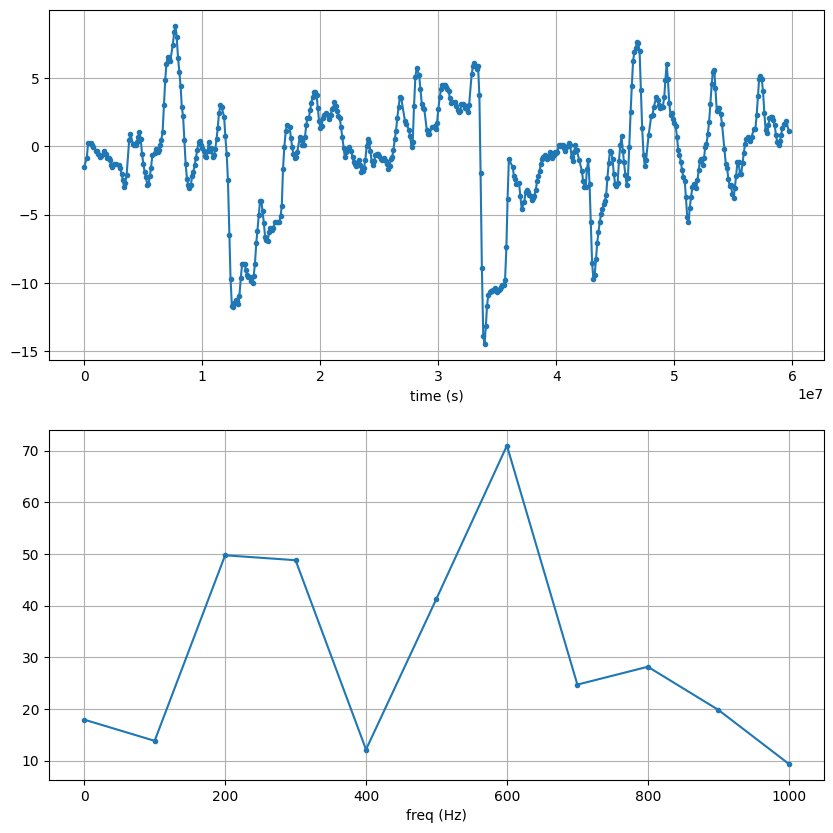

In [14]:
t = m5_nofault["TimeUS"]
y = m5_nofault["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

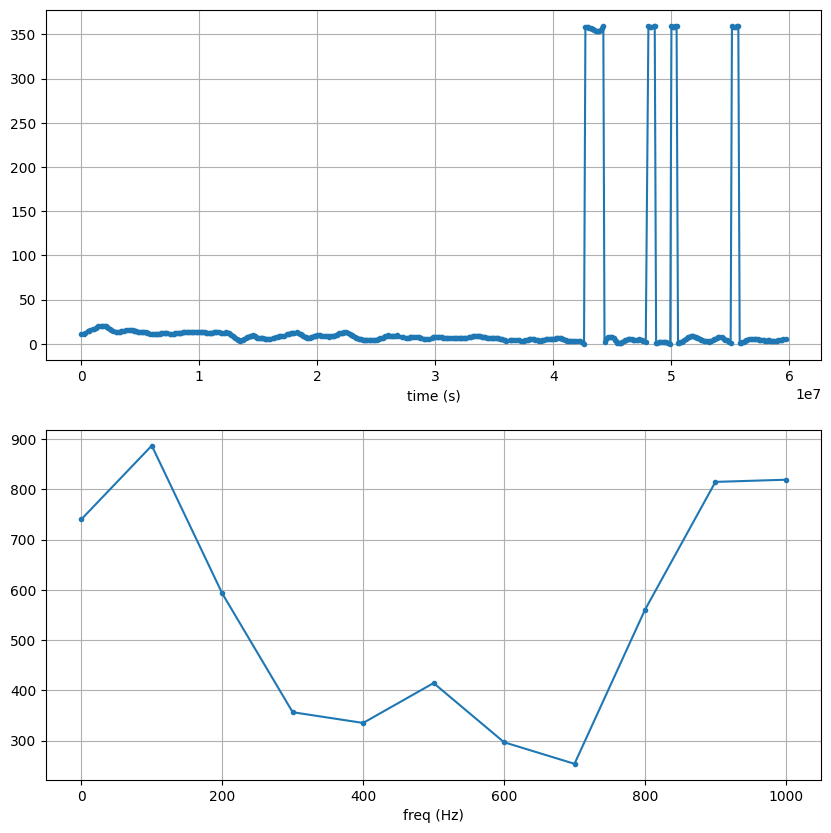

In [15]:
t = m5_nofault["TimeUS"]
y = m5_nofault["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

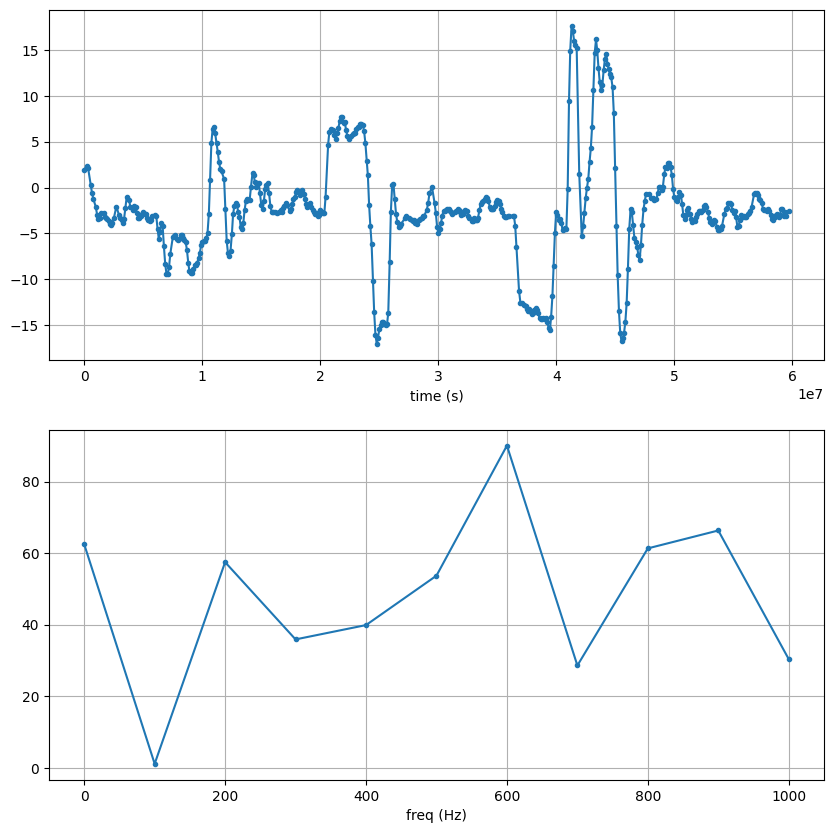

In [16]:
t = m5_nofault["TimeUS"]
y = m5_nofault["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

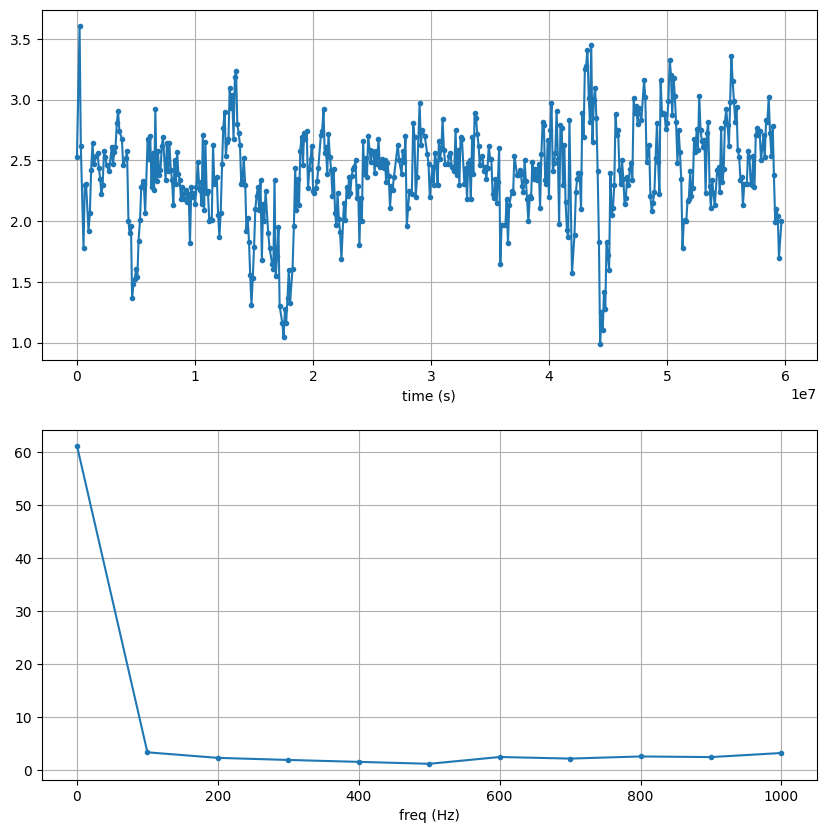

In [17]:
t = m5_nofault["TimeUS"]
y = m5_nofault["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

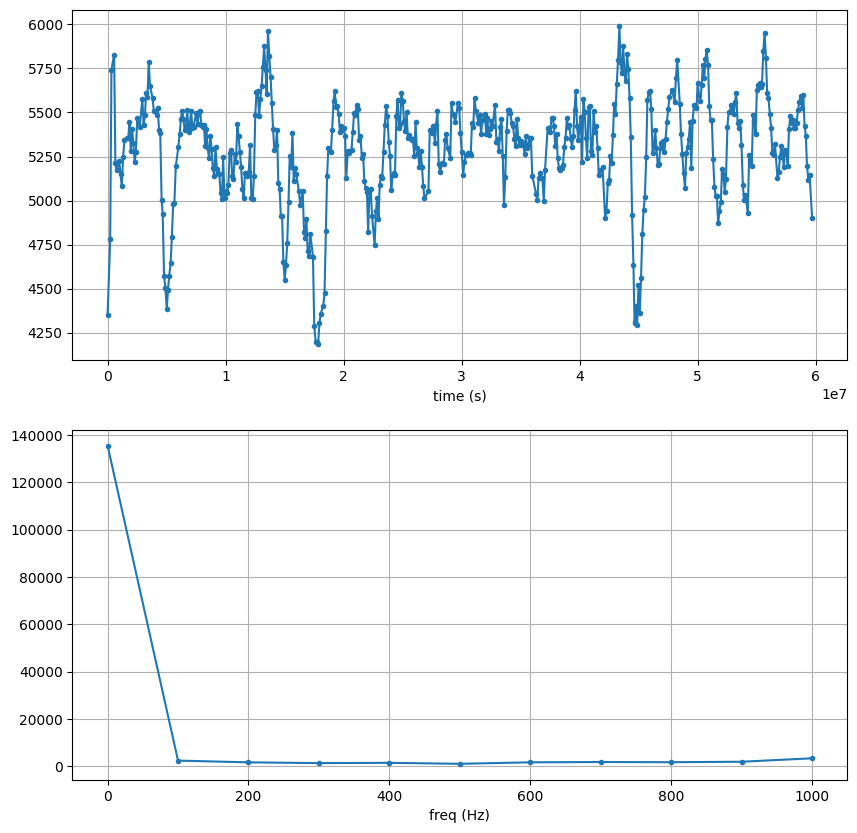

In [18]:
t = m5_nofault["TimeUS"]
y = m5_nofault["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

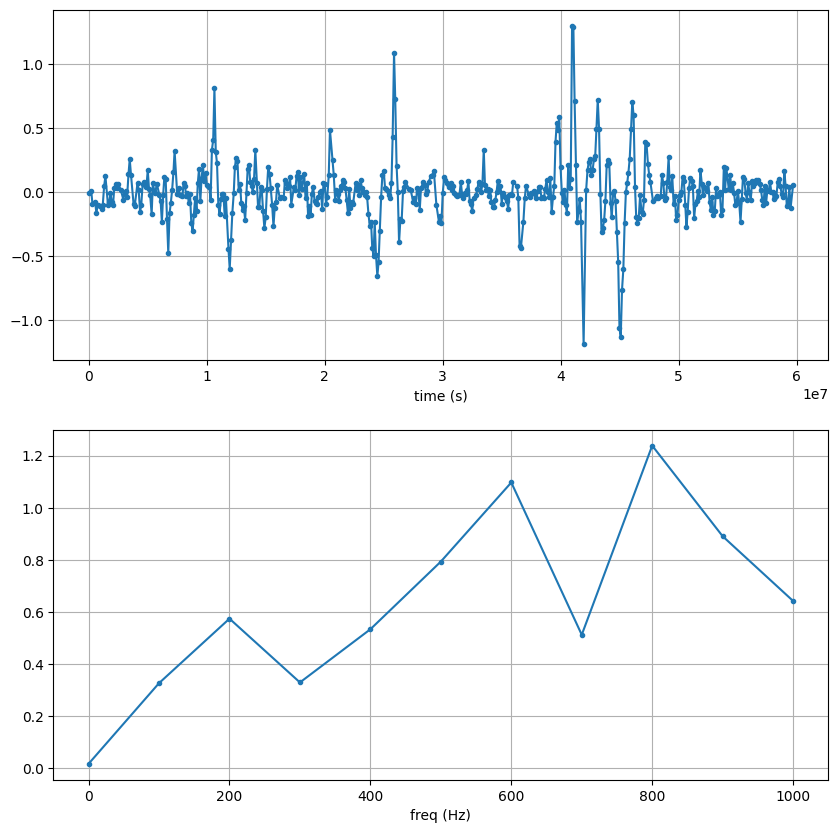

In [19]:
t = m5_nofault["TimeUS"]
y = m5_nofault["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

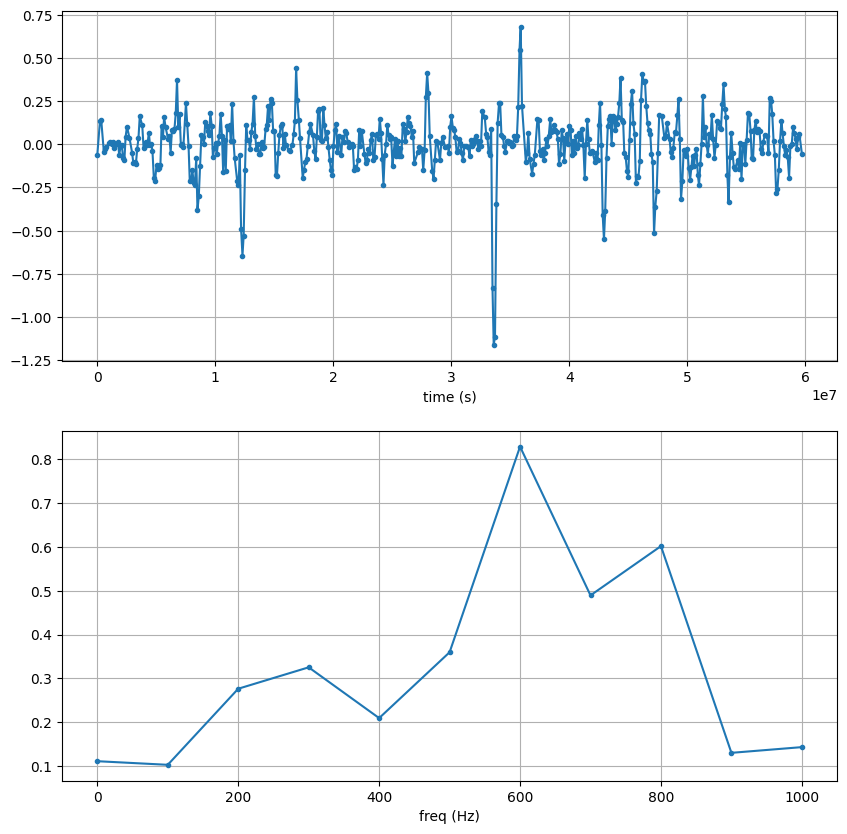

In [20]:
t = m5_nofault["TimeUS"]
y = m5_nofault["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

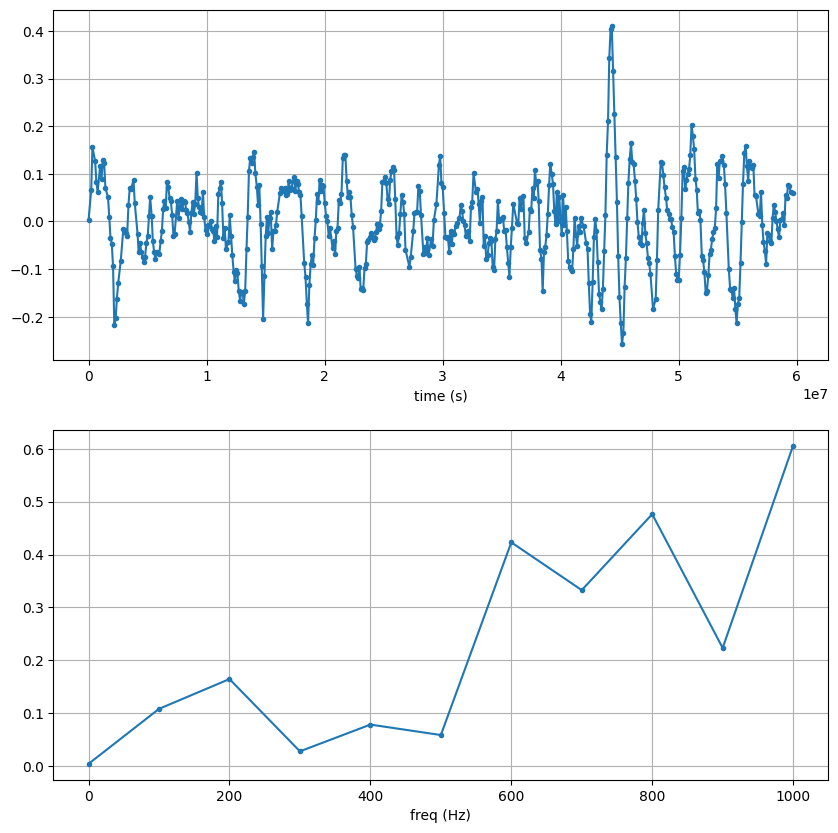

In [21]:
t = m5_nofault["TimeUS"]
y = m5_nofault["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

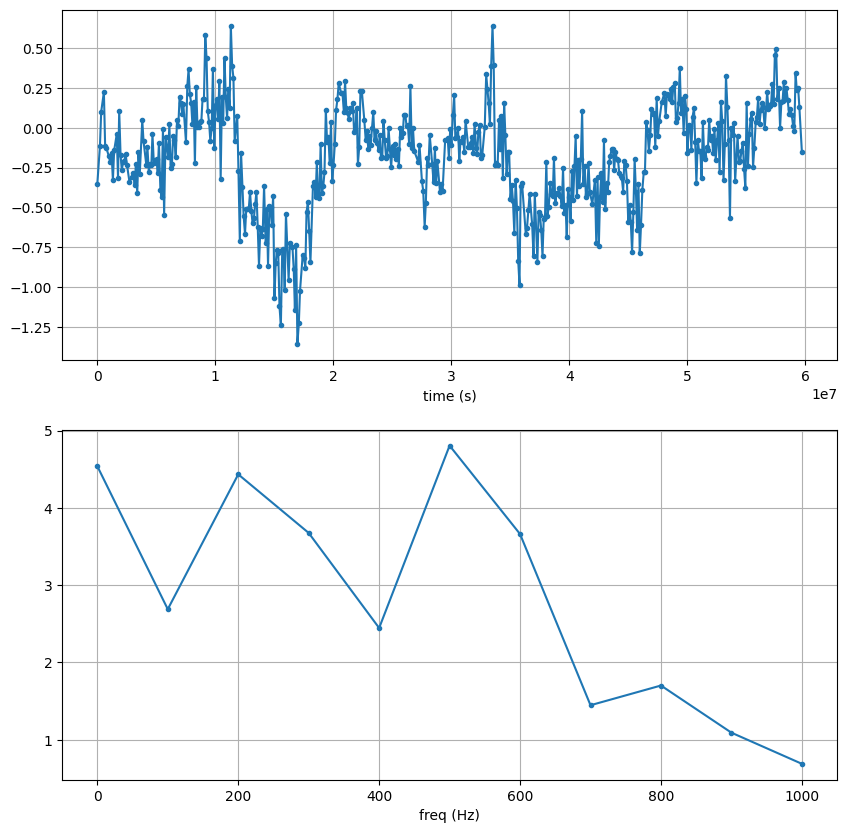

In [22]:
t = m5_nofault["TimeUS"]
y = m5_nofault["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

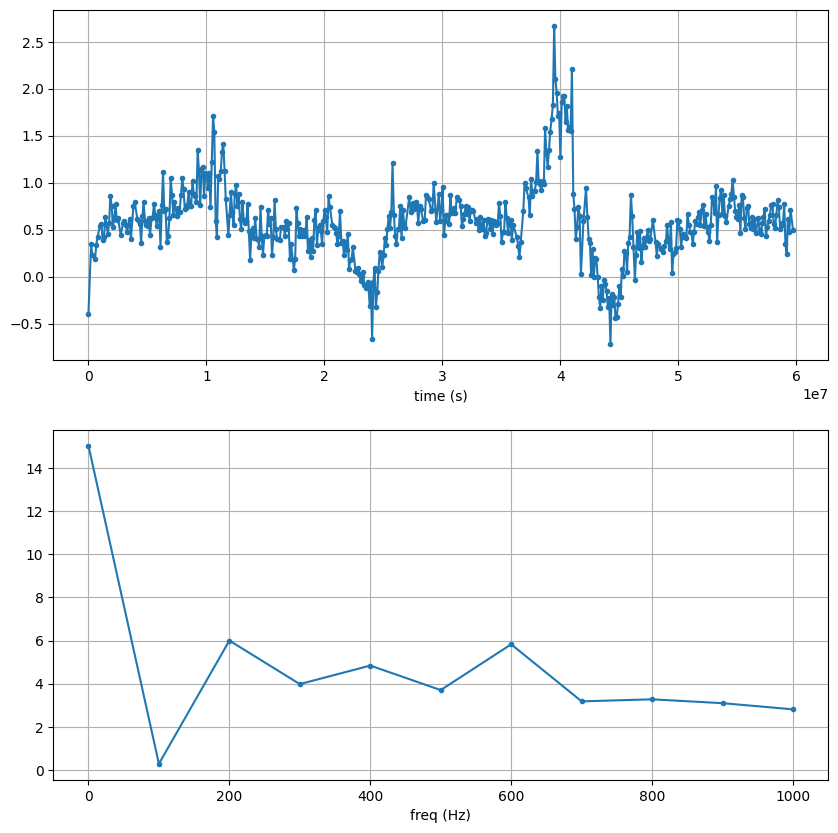

In [23]:
t = m5_nofault["TimeUS"]
y = m5_nofault["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

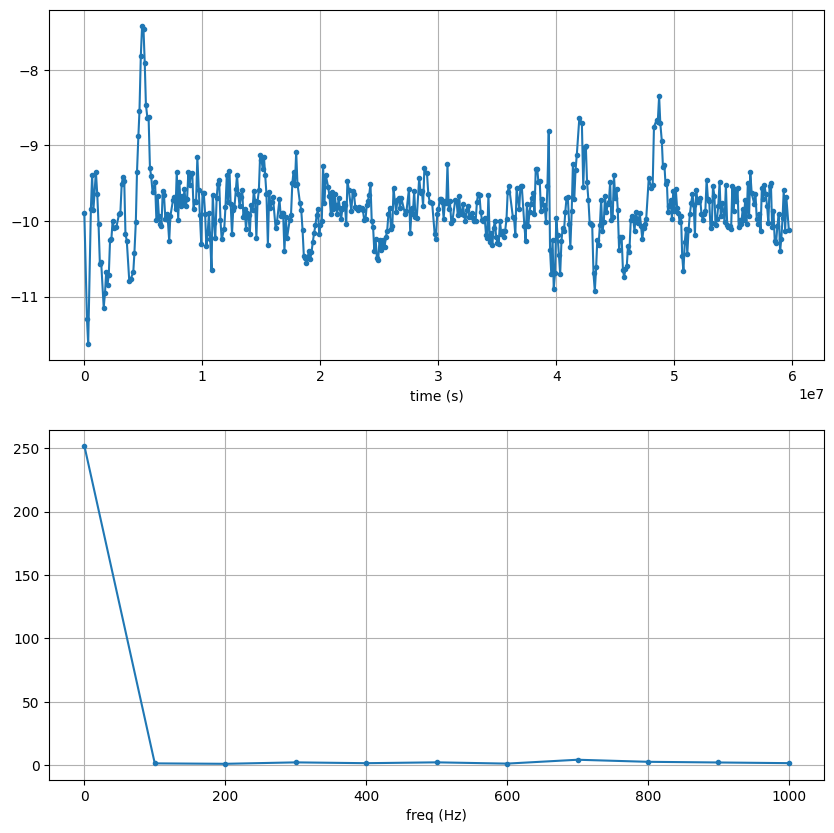

In [24]:
t = m5_nofault["TimeUS"]
y = m5_nofault["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()